# 2019 Mitch Watch

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import glob

from scipy.interpolate import make_interp_spline, BSpline

sns.set(style="whitegrid", 
        palette="pastel", 
        font='Circular Spotify Text', 
        font_scale = 1.1, 
        rc= {'grid.color': '.95', 'xtick.color': '.3', 'ytick.color': '.3'})


In [2]:
team_colors = {
    'SF': '#AA0000',
    'KC': '#E31837',
    'ARI': '#97233F',
    'ATL': '#A71930',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#002244',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#000000',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_main = {
    'SF': '#AA0000',
    'KC': '#E31837',
    'ARI': '#97233F',
    'ATL': '#A71930',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#002244',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#D50A0A',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_gray = {
    
    'SF': '#AA0000',
    'KC': '#D9D9D9',
    'ARI': '#D9D9D9',
    'ATL': '#D9D9D9',
    'BAL': '#D9D9D9',
    'PHI': '#D9D9D9',
    'NYG': '#D9D9D9',
    'NO': '#D9D9D9',
    'NE': '#D9D9D9',
    'MIN': '#D9D9D9',
    'MIA': '#D9D9D9',
    'IND': '#D9D9D9',
    'CLE': '#D9D9D9',
    'LAC': '#D9D9D9',
    'DEN': '#D9D9D9',
    'CAR': '#D9D9D9',
    'GB': '#D9D9D9',
    'DET': '#D9D9D9',
    'OAK': '#D9D9D9',
    'CIN': '#D9D9D9',
    'WAS': '#D9D9D9',
    'TEN': '#D9D9D9',
    'TB': '#D9D9D9',
    'PIT': '#D9D9D9',
    'NYJ': '#D9D9D9',
    'BUF': '#D9D9D9',
    'LA': '#D9D9D9',
    'JAX': '#D9D9D9',
    'DAL': '#D9D9D9',
    'CHI': '#D9D9D9',
    'HOU': '#D9D9D9',
    'SEA': '#D9D9D9'
}

## Data

In [4]:
df = pd.read_csv("../data/nflscrapR/reg_pbp_2019.csv", low_memory=False)

## EPA per punt

In [5]:
df_punts = df[df['play_type'] == 'punt']

In [6]:
(df_punts.loc[:,['home_team', 
                 'away_team', 
                 'posteam', 
                 'punter_player_name', 
                 'punt_downed',
                 'epa', 
                 'return_yards', 
                 'fumble',
                 'kick_distance'
                ]]
 .sort_values('epa', ascending=False)
 .head(20))

,home_team,away_team,posteam,punter_player_name,punt_downed,epa,return_yards,fumble,kick_distance
6360,NE,NYJ,NYJ,L.Edwards,0.0,7.168898,0,1.0,43.0
5701,JAX,TEN,JAX,L.Cooke,0.0,6.251980,0,1.0,50.0
13152,PHI,NYJ,NYJ,L.Edwards,0.0,6.193162,0,1.0,54.0
13885,SF,CLE,SF,M.Wishnowsky,0.0,5.955368,-6,1.0,50.0
1617,SEA,CIN,SEA,M.Dickson,0.0,5.746275,9,1.0,43.0
960,MIA,BAL,BAL,S.Koch,0.0,5.389219,0,1.0,56.0
12449,HOU,ATL,ATL,M.Wile,0.0,4.878535,0,1.0,40.0
1526,LAC,IND,IND,R.Sanchez,0.0,4.850979,0,1.0,39.0
7922,SEA,NO,SEA,M.Dickson,0.0,4.802122,0,1.0,39.0
2184,ARI,DET,ARI,A.Lee,0.0,4.129043,0,1.0,53.0


In [7]:
#df_punts.groupby(['punter_player_name', 'posteam'])['epa'].mean().reset_index().sort_values('epa', ascending=False)

df_punts.groupby(['punter_player_name', 'posteam']).agg({'epa' : 'mean','play_id' : 'count'}).reset_index()

,punter_player_name,posteam,epa,play_id
0,A.Cole,OAK,-0.155569,22
1,A.Lee,ARI,0.502331,16
2,B.Anger,HOU,0.462919,10
3,B.Colquitt,MIN,0.253654,19
4,B.Kern,TEN,0.178085,31
5,B.Pinion,TB,0.035639,20
6,C.Bojorquez,BUF,-0.121143,26
7,C.Johnston,PHI,0.543252,19
8,C.Jones,DAL,-0.162984,16
9,C.Wadman,DEN,-0.268001,21


## Return yards per punt

In [27]:
df_punts.groupby(['posteam'])['return_yards'].count().reset_index().sort_values('return_yards', ascending=True)

,posteam,return_yards
28,SF,11
2,BAL,13
15,KC,14
16,LA,14
17,LAC,15
1,ATL,16
8,DAL,16
13,IND,16
19,MIN,19
25,PHI,19


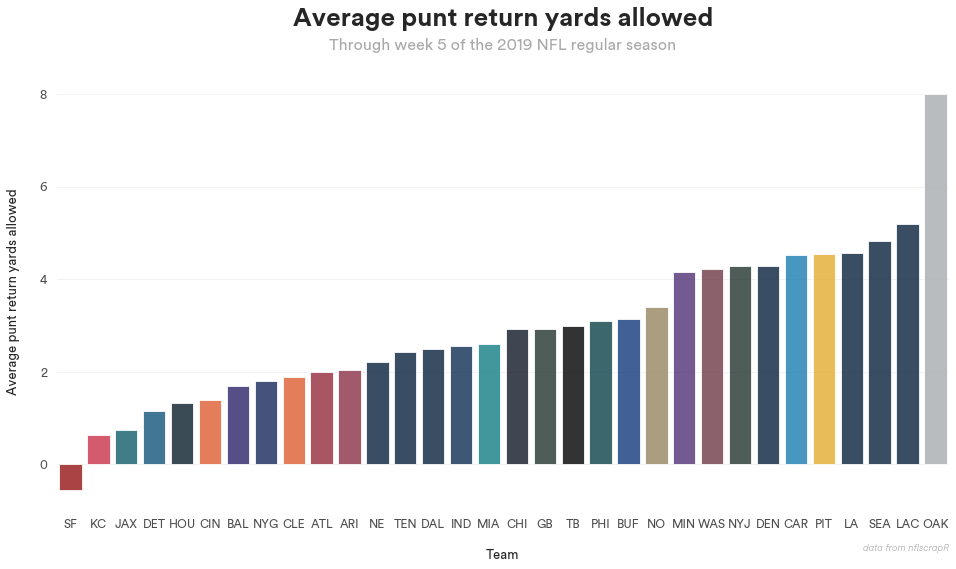

In [31]:
bars = df_punts.groupby(['posteam'])['return_yards'].mean().reset_index().sort_values('return_yards', ascending=True)

f, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x='posteam', y='return_yards', data=bars, palette=team_colors, alpha=0.8)

ax.text(x=0.5, 
        y=1.1, 
        s='Average punt return yards allowed', 
        fontsize=26,
        weight='bold', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=0.5, 
        y=1.05, 
        s='Through week 5 of the 2019 NFL regular season', 
        fontsize=16, 
        color='darkgray', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=1, 
        y=-0.1, 
        s='data from nflscrapR', 
        fontsize=10,
        weight='light',
        style='italic',
        color='darkgray', 
        ha='right', 
        va='bottom', 
        transform=ax.transAxes)

ax.set_ylabel('Average punt return yards allowed\n')
ax.set_xlabel('\nTeam')

sns.despine(left=True, right=True, top=True, bottom=True)
plt.savefig('output/punt/' + 'mean_return_yards.png'.format(), format='png', dpi=300, bbox_inches='tight')

## Punt distance

In [33]:
df_punts.groupby(['posteam'])['kick_distance'].max().reset_index().sort_values('kick_distance', ascending=False)

,posteam,kick_distance
5,CHI,75.0
16,LA,71.0
12,HOU,71.0
30,TEN,70.0
7,CLE,68.0
11,GB,66.0
31,WAS,66.0
9,DEN,64.0
3,BUF,64.0
21,NO,64.0


## Charts — EPA/punt vs avg. return yards

In [10]:
data = df_punts.groupby(['posteam']).agg({'epa' : 'mean','play_id' : 'count', 'return_yards' : 'mean'}).reset_index()
data.head()

,posteam,epa,play_id,return_yards
0,ARI,0.418850,24,2.041667
1,ATL,0.471455,16,2.000000
2,BAL,0.532995,13,1.692308
3,BUF,-0.312251,27,3.148148
4,CAR,0.128660,21,4.523810


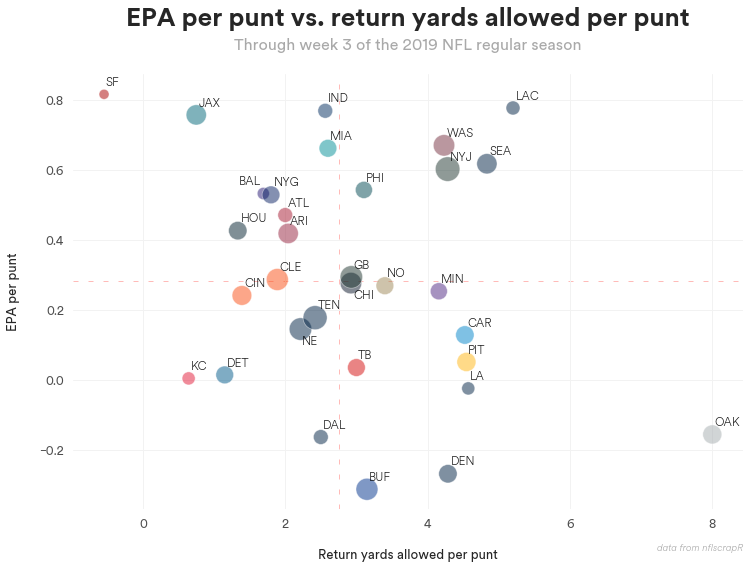

In [16]:
f, ax = plt.subplots(figsize=(12, 8))

# Plotting all other teams and adding names

plt.axhline(np.median(data['epa']), linestyle=(0, (5, 10)), color='r', alpha=0.7, lw=1, zorder=-1)
plt.axvline(np.median(data['return_yards']), linestyle=(0, (5, 10)), color='r', alpha=0.7, lw=1, zorder=-1)

ax = sns.scatterplot(x="return_yards", 
                     y="epa",
                     size='play_id',
                     hue="posteam", 
                     palette=team_colors_main,
                     data=data,
                     legend=False,
                     alpha=0.5,
                     sizes=(100, 600),
                    )

ax.text(x=0.5, 
        y=1.1, 
        s='EPA per punt vs. return yards allowed per punt', 
        fontsize=26,
        weight='bold', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=0.5, 
        y=1.05, 
        s='Through week 3 of the 2019 NFL regular season', 
        fontsize=16, 
        color='darkgray', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=1, 
        y=-0.1, 
        s='data from nflscrapR', 
        fontsize=10,
        weight='light',
        style='italic',
        color='darkgray', 
        ha='right', 
        va='bottom', 
        transform=ax.transAxes)
        
texts = [plt.text(data['return_yards'][line], data['epa'][line], data['posteam'][line], horizontalalignment='left', size=12, color='black', weight='light', alpha=0.9) for line in range(0,data.shape[0])]

ax.set_ylabel('EPA per punt\n')
ax.set_xlabel('\nReturn yards allowed per punt')



#texts.append(plt.text(data[data['posteam'] == 'SF']['return_yards'].values[0], data[data['posteam'] == 'SF']['epa'].values[0], data[data['posteam'] == 'SF']['posteam'].values[0], horizontalalignment='left', size=20, color='black', weight='semibold'))
adjust_text(texts, force_points=(4, 6), force_text=(1, 2.5))

#plt.xlim(reversed(plt.xlim()))    

sns.despine(left=True, right=True, top=True, bottom=True)
plt.savefig('output/punt/' + 'epa_vs_return_yards.png'.format(), format='png', dpi=300, bbox_inches='tight')

In [ ]:
data = df_punts.groupby(['posteam']).agg({'kick_distance' : 'mean','play_id' : 'count', 'return_yards' : 'mean'}).reset_index()
data.head()

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

# Plotting all other teams and adding names

plt.axhline(np.median(data['kick_distance']), linestyle=(0, (5, 10)), color='r', alpha=0.7, lw=1, zorder=-1)
plt.axvline(np.median(data['return_yards']), linestyle=(0, (5, 10)), color='r', alpha=0.7, lw=1, zorder=-1)

ax = sns.scatterplot(x="return_yards", 
                     y="kick_distance",
                     size='play_id',
                     hue="posteam", 
                     palette=team_colors_main,
                     data=data,
                     legend=False,
                     alpha=0.5,
                     sizes=(100, 600),
                    )

ax.text(x=0.5, 
        y=1.1, 
        s='Kick distance per punt vs. return yards allowed per punt', 
        fontsize=26,
        weight='bold', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=0.5, 
        y=1.05, 
        s='Through week 3 of the 2019 NFL regular season', 
        fontsize=16, 
        color='darkgray', 
        ha='center', 
        va='bottom', 
        transform=ax.transAxes)

ax.text(x=1, 
        y=-0.1, 
        s='data from nflscrapR', 
        fontsize=10,
        weight='light',
        style='italic',
        color='darkgray', 
        ha='right', 
        va='bottom', 
        transform=ax.transAxes)
        
texts = [plt.text(data['return_yards'][line], data['kick_distance'][line], data['posteam'][line], horizontalalignment='left', size=12, color='black', weight='light', alpha=0.9) for line in range(0,data.shape[0])]

ax.set_ylabel('Kick distance per punt\n')
ax.set_xlabel('\nReturn yards allowed per punt')



#texts.append(plt.text(data[data['posteam'] == 'SF']['return_yards'].values[0], data[data['posteam'] == 'SF']['epa'].values[0], data[data['posteam'] == 'SF']['posteam'].values[0], horizontalalignment='left', size=20, color='black', weight='semibold'))
adjust_text(texts, force_points=(4, 6), force_text=(1, 2.5))

#plt.xlim(reversed(plt.xlim()))    

sns.despine(left=True, right=True, top=True, bottom=True)
plt.savefig('output/punt/' + 'kick_distance_vs_return_yards.png'.format(), format='png', dpi=300, bbox_inches='tight')